Henry (Hank) Besser

- Importing the NumPy and PlyPlot modules and assigning them shorter, more useable aliases (i.e. np and plt, respectively). Also making sure the figures show up inline using a magic function (%matplotlib inline) for overall coherency of the report.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem under study: Exploring Radioactive Decay with Two Nuclear Species

- Two types of nuclei, `A` and `B`, undergo radioactive decay (i.e. The nuclei will break apart at some time). The quanitity of type `A` and type `B` is called its population and is denoted by `A(t)` and `B(t)` respectivley. It is given that type `A` nuclei decay into type `B` which also decays. This is called a decay chain--one species decays into another species and so on (if applicable). The two types of nuclei decay are described in accordance to the the coupled differential equations below:

$$\frac{dN_{A}}{dt} = \frac{-N_{A}}{\tau_{A}}$$

$$\frac{dN_{B}}{dt} = \frac{-N_{A}}{\tau_{A}} - \frac{N_{B}}{\tau_{B}}$$

- $\tau_{A}$ and $\tau_{B}$ are decay constants

- The goal of this exploration is to first use Euler method to approximate the first order differential equations computationally: that is using a computer to solve the two equations by finding the numerical solutions. Then after solving diffrential equations analytically, the exact solutions found for the the two types of nuclei (`A` and `B`) can be compared with numercial solutions.     

### Part B. Euler Method (First order): A numerical method for approximating the solutions to the coupled differential equations.

- Although straying away from the prompt given, the function below is an all in encomposing computational method where one can define all the constants and intitial conditions inside the function without having to copy the whole script when changing the user given values for each run. The function will be decribed below.      

In [2]:
def euler_decay_two_species(start_A, start_B, tau_A, tau_B, time_max, dt):
    """
    Python Program simulating the decay of two nuclei types in a decay-chain system.
    Solves the numerical solutions for the decay of two radioactive nuclear species,
    using the Euler method--where type A nuclei decay into type B nuclei 
    (the differential equation are coupled).
    """
    
    dt = float(dt)                      # time step (in seconds)
    
    N_dt = int(round(time_max/dt))      # number of time steps
                                        # (i.e the number of numerical solutions)
                                        # making sure the number of time steps is an integer
    
    time_max = N_dt*dt                  # Total time (in seconds)
    
    
    time = np.linspace(0, time_max, N_dt+1)     # total time with 
                                                # N_dt number of time steps 
                                                # using linespace so both first and last time is included
                                                
    
    N_A = np.zeros(time.shape)                  # zero array for N_A of N_A[i] values 
    N_B = np.zeros(time.shape)                  # zero array for N_B of N_B[i] values
    
    
    
    N_A[0] = start_A    # assigns initial number of nuclei N_A as the initial conditon 
                        # (i.e. for N_A[i], when i=0)
    N_B[0] = start_B    # assigns initial number of nuclei N_B as the initial conditon 
                        # (i.e. for N_B[i], when i=0)
        
    for i in range(0, N_dt):                   # i=0,1,...,N_dt-1 (look at 'time' value for clarity).
        N_A[i+1] = N_A[i] - (N_A[i]/tau_A)*dt  # Euler method to numerically solve for N_A
        N_B[i+1] = N_B[i] - (N_B[i]/tau_B)*dt + (N_A[i]/tau_A)*dt # to numerically solve for N_B          
    return time, N_A, N_B  # return values  
                        
    

- For clarity and description here are the two equations used for calculating numerical elements to be to be stored in  the arrays `N_A` and `N_B`:

$${N_{A}(time + dt)} =  {N_{A}(time)} - \frac{N_{A}}{\tau_{A}}*dt$$


$${N_{B}(time + dt)} =  {N_{B}(time)} - (\frac{N_{B}}{\tau_{B}}*dt + \frac{N_{A}}{\tau_{A}}*dt)$$

- Now assigning the values for the initial conditions and constants, assigning $\tau_{A}$ = 1 and $\tau_{B}$ = 3 and inspecting the elements in the arrays `NA` and `NB` 

In [3]:
time, NA, NB = euler_decay_two_species(start_A=100, start_B=100,\
                                    tau_A=1, tau_B=3,time_max=20, dt=0.01)


In [4]:
NA

array([  1.00000000e+02,   9.90000000e+01,   9.80100000e+01, ...,
         1.90159841e-07,   1.88258243e-07,   1.86375660e-07])

In [5]:
NB

array([ 100.        ,  100.66666667,  101.32111111, ...,    0.31674295,
          0.31568714,    0.31463486])

- Now plotting `NA` and `NB` vs time

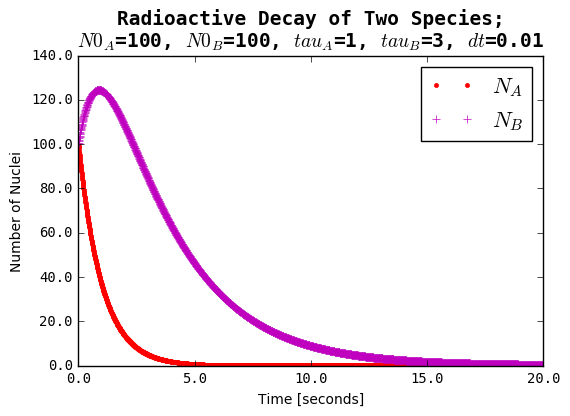

In [6]:
plt.figure()

plt.plot(time, NA, 'r.',time, NB,'m+') 

ax = plt.gca()

ax.set_title("Radioactive Decay of Two Species;\n\
$N0_{A}$=100, $N0_{B}$=100, $tau_{A}$=1, $tau_{B}$=3, $dt$=0.01",\
family='monospace',size=14, weight='bold')

ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Number of Nuclei")

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("$N_{A}$", "$N_{B}$"),fontsize=16)
plt.show()

Fig 1: `N_B` increases at early times as `N_A` decays fast (exponential) 

- Now changing the vales of $\tau_{A}$ / $\tau_{B}$ < 1  - will not display plotting code for future plots becuase besides from labeling, the code to plot the graphs is similar to figure 1  

$\tau_{A}$ = 1 and $\tau_{B}$ = 20

In [7]:
# When tau_A < tau_B (i.e when tau_A \ tau_B is smaller than 1)
time1, NA1, NB1 = euler_decay_two_species(start_A=100, start_B=100,\
                                    tau_A=1, tau_B=20,time_max=20, dt=0.01)

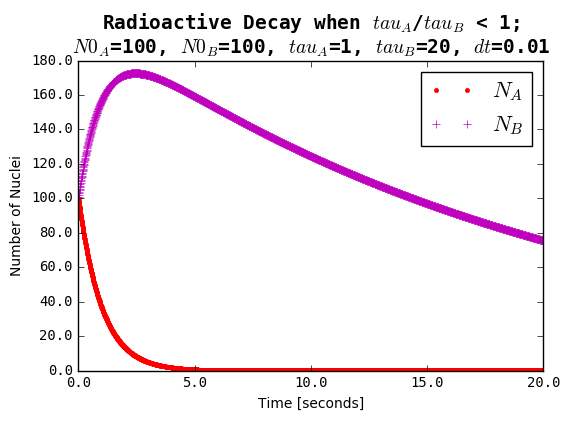

In [8]:
plt.figure()

plt.plot(time1, NA1, 'r.',time1, NB1,'m+') 

ax = plt.gca()

ax.set_title("Radioactive Decay when $tau_{A}$/$tau_{B}$ < 1;\n\
$N0_{A}$=100, $N0_{B}$=100, $tau_{A}$=1, $tau_{B}$=20, $dt$=0.01",\
family='monospace',size=14, weight='bold')

ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Number of Nuclei")

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("$N_{A}$", "$N_{B}$"),fontsize=16)
plt.show()

Figure 2:

- Now changing the vales of $\tau_{A}$ / $\tau_{B}$ is very large

$\tau_{A}$ = 30 and $\tau_{B}$ = 1

In [9]:
# When tau_A >> tau_B (i.e when tau_A \ tau_B is very large)
time2, NA2, NB2 = euler_decay_two_species(start_A=100, start_B=100,\
                                    tau_A=30, tau_B=1,time_max=20, dt=0.01)

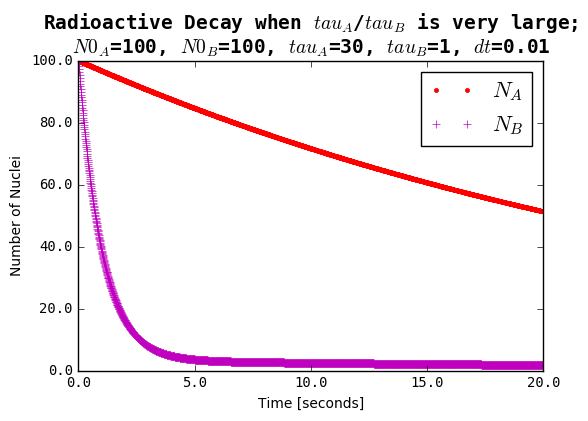

In [10]:
plt.figure()

plt.plot(time2, NA2, 'r.',time1, NB2,'m+') 

ax = plt.gca()

ax.set_title("Radioactive Decay when $tau_{A}$/$tau_{B}$ is very large;\n\
$N0_{A}$=100, $N0_{B}$=100, $tau_{A}$=30, $tau_{B}$=1, $dt$=0.01",\
family='monospace',size=14, weight='bold')

ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Number of Nuclei")

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("$N_{A}$", "$N_{B}$"),fontsize=16)
plt.show()

Figure 3: 

- Now changing the vales of $\tau_{A}$ / $\tau_{B}$  = 1

$\tau_{A}$ = 3 and $\tau_{B}$ = 3

In [11]:
# When tau_A = tau_B (i.e when tau_A \ tau_B is 1)
time3, NA3, NB3 = euler_decay_two_species(start_A=100, start_B=100,\
                                    tau_A=3, tau_B=3,time_max=20, dt=0.01)

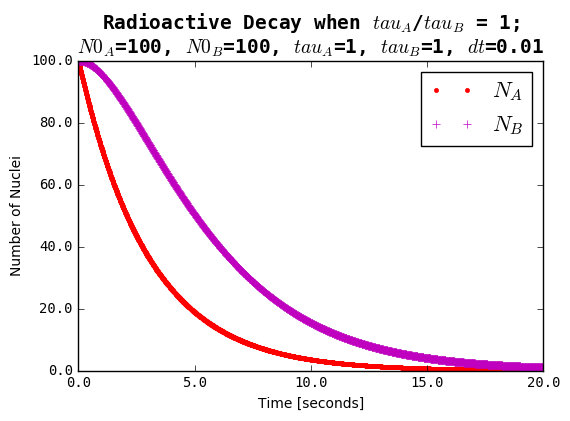

In [12]:
plt.figure()

plt.plot(time3, NA3, 'r.',time3, NB3,'m+') 

ax = plt.gca()

ax.set_title("Radioactive Decay when $tau_{A}$/$tau_{B}$ = 1;\n\
$N0_{A}$=100, $N0_{B}$=100, $tau_{A}$=1, $tau_{B}$=1, $dt$=0.01",\
family='monospace',size=14, weight='bold')

ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Number of Nuclei")

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("$N_{A}$", "$N_{B}$"),fontsize=16)
plt.show()

Figure 4:

### Part C. Solving the Radioactive Decay Analytically for `N_A` and `N_B`

-1. $$\frac{dN_{A}}{dt} = \frac{-N_{A}}{\tau_{A}}$$ 




-2. $$\frac{dN_{B}}{dt} = \frac{-N_{A}}{\tau_{A}} - \frac{N_{B}}{\tau_{B}}$$




-3. The Analytical Solution for `N_A`: $$N_{A} = N_{A}[0] * exp(-time/\tau_{A})$$




-4. Solving for B is harder: Subsitute 3 into 2: $$\frac{dN_{B}}{dt} = \frac{N_{A}[0] * exp(-time/\tau_{A})}{\tau_{A}} - \frac{N_{B}}{\tau_{B}} $$  




-5. Now setting = 0: $$\frac{dN_{B}}{dt} + \frac{N_{B}}{\tau_{B}} - \frac{N_{A}[0] * exp(-time/\tau_{A})}{\tau_{A}} = 0$$




-6. Now the differential equation is solveable: 
$${N_{B}[0] * exp(-time/\tau_{B})} + \frac{N_{A}[0]}{\frac{\tau_{A}}{\tau_{b}}-1} * [exp(-time/\tau_{A})- exp(-time/\tau_{B})]$$ 

- Now implementing the analytical analysis in code to plot the exact solutions on top of the numerical solutions

$\tau_{A}$ = 1 and $\tau_{B}$ = 3

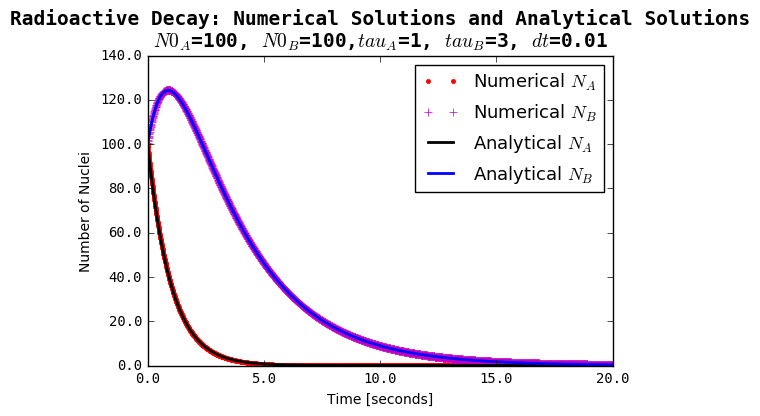

In [13]:
time, NA, NB = euler_decay_two_species(start_A=100, start_B=100,\
                                       tau_A=1, tau_B=3,time_max=20, dt=0.01)   
tau_A = 1 
tau_B = 3

#Analytical solutions
analytical_NA = NA[0]*np.exp(-time/tau_A)
analytical_NB =  NB[0]*np.exp(-time/tau_B) +\
(NA[0]/((tau_A/tau_B)-1))*(np.exp(-time/(tau_A))-(np.exp(-time/(tau_B))))   
 
plt.figure()

plt.plot(time, NA, "r.",linewidth=1) 
plt.plot(time, NB,"m+", linewidth=1)
plt.plot(time, analytical_NA, "k-",linewidth=2 )
plt.plot(time, analytical_NB, "b-",linewidth=2 )


ax = plt.gca()

ax.set_title("Radioactive Decay: Numerical Solutions and Analytical Solutions\n\
$N0_{A}$=100, $N0_{B}$=100,$tau_{A}$=1, $tau_{B}$=3, $dt$=0.01",\
family='monospace',size=14, weight='bold')

ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Number of Nuclei")

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("Numerical $N_{A}$", "Numerical $N_{B}$", "Analytical $N_{A}$", "Analytical $N_{B}$"  ),fontsize=13)
plt.show()

Figure 5:

Now Changing `dt` to 0.1 (larger step)

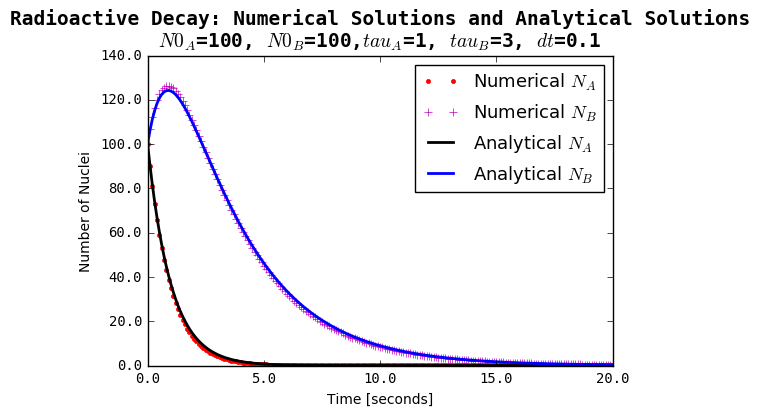

In [21]:
time, NA, NB = euler_decay_two_species(start_A=100, start_B=100,\
                                       tau_A=1, tau_B=3,time_max=20, dt=0.1)   
tau_A = 1 
tau_B = 3

#Analytical solutions
analytical_NA = NA[0]*np.exp(-time/tau_A)
analytical_NB =  NB[0]*np.exp(-time/tau_B) +\
(NA[0]/((tau_A/tau_B)-1))*(np.exp(-time/(tau_A))-(np.exp(-time/(tau_B))))   
 
plt.figure()

plt.plot(time, NA, "r.",linewidth=1) 
plt.plot(time, NB,"m+", linewidth=1)
plt.plot(time, analytical_NA, "k-",linewidth=2 )
plt.plot(time, analytical_NB, "b-",linewidth=2 )


ax = plt.gca()

ax.set_title("Radioactive Decay: Numerical Solutions and Analytical Solutions\n\
$N0_{A}$=100, $N0_{B}$=100,$tau_{A}$=1, $tau_{B}$=3, $dt$=0.1",\
family='monospace',size=14, weight='bold')

ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Number of Nuclei")

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("Numerical $N_{A}$", "Numerical $N_{B}$", "Analytical $N_{A}$", "Analytical $N_{B}$"  ),fontsize=13)
plt.show()

Figure 6: For $N_{A}$ and $N_{B}$ decays the Euler method was not as good
of a way to approximate the exact solution (the curves do not exactly
overlap) compared to figure 5. That step was not as small (dt = 0.1) which
made made the first order approximation accurate but not as accurate as
in figure 5.

#### Part D Critical Analysis: What if we did not have the exact solution, how would we if the numerical solutions when `dt` = 0.01 is accurate enough? 

We could implement a solution to a higher order differential equation when numerically solving for the decay of radioactive species. A higher order solution calculates a much more accurate soultion and is only slightly more of computational burden. 

For instance here is some code one can implement if wanting to comapare the solution for `N_A` that was previously found using the Euler method with the 2nd order Runge-Kutta Method.  

In [15]:
def calc_runge(start_atoms, tau, time_max, dt):
    """
    Calculates solution to the radioactive decay problem using 
    the 2nd order Runge-Kutta method. 
    """
    dt = float(dt)                        # time step (in seconds)
    
    N_dt = int(round(time_max/dt))        # number of time steps (i.e numerical solutions)
    
    time_max = N_dt*dt                    # Total time (in seconds)
    
    
    time_r = np.linspace(0, time_max, N_dt+1)  # total time with N_dt number of time steps
    
    nuc = np.zeros(time_r.size)                # zero array nuc[i] values (number of time steps)  
      

    nuc[0] = start_atoms    # assigns initial number of nuclei
                            # as the initial conditon (i.e. nuc[i], when i=0)
    
    for i in range(0, N_dt):                   # i=0,1,...,N_dt-1
        dx = -nuc[i]/tau
        nuc_m = nuc[i] +0.5*dt*dx
        dx2 = -nuc_m/tau
        nuc[i+1] = nuc[i]+dt*dx2  #  2nd order Runge-Kutta method
    return time_r, nuc

In [16]:
time_r, nuc_r = calc_runge(start_atoms=100, tau=1, time_max=20, dt=0.01)

In [17]:
time, NA, NB = euler_decay_two_species(start_A=100, start_B=100,\
                                       tau_A=1, tau_B=3,time_max=20, dt=0.1)  

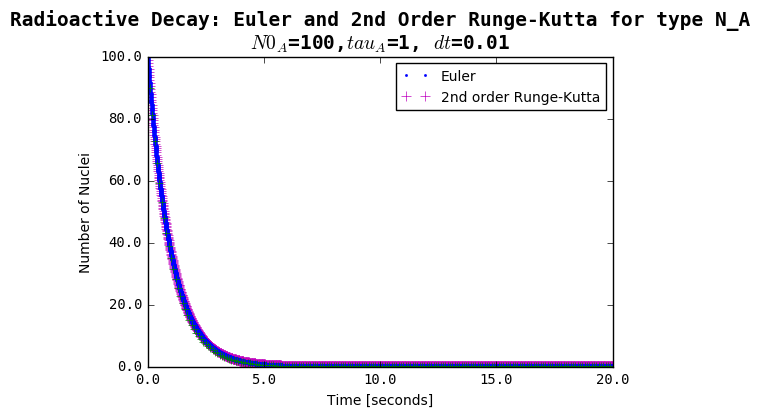

In [18]:
plt.figure()

plt.plot(time, NA, "b.",markersize=3) 
plt.plot(time_r, nuc_r,"m+", markersize=7)

plt.plot(time_r, nuc_r, 'b.',time, NA,'g+') 

ax = plt.gca()

ax.set_title("Radioactive Decay: Euler and 2nd Order Runge-Kutta for type N_A\n\
$N0_{A}$=100,$tau_{A}$=1, $dt$=0.01",\
family='monospace',size=14, weight='bold')

ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Number of Nuclei")

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("Euler", "2nd order Runge-Kutta"),fontsize=10)
plt.show()

Figure 7: Without knowing the exact solution, it is clear that when comparing the higher order approximation with the numerical solution that was obtained using the Euler method, the answer was accurate enough (marker overlap and not much visible error from graph). 